<div align=center>
<font face="XB Niloofar">
<font size=4>
گزارش آزمایش هفتم
<p></p>
<font size=4>
فرهاد فلاح 97102214 
<p></p>


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import svm
from skimage import data, exposure
from sklearn.model_selection import train_test_split
import os
from skimage import io,color
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
import time


<div align=right>
<font face="XB Niloofar">
<font size=6 ,bold>
بخش اول:
<p></p>
<font size=4>
در این بخش هم از تابع آماده استفاده میکنیم و هم یکبار خودمان تابع را میسازیم برای این منظور،ابتدا یک تابع برای شیفت چرخشی به سمت چپ برای 8 بیت تعریف میکنیم. 

In [3]:
def leftRotate(n):
    n = n*2
    if n>=256:
        n = n-256+1
    return n
    


<div align=right>
<font face="XB Niloofar">
<font size=6 ,bold>
<p></p>
<font size=4>
در ادامه تابع اصلی را تعریف میکنیم که با لغزاندن پنجره 3*3 بر روی تصویر به دست می آید.سپس با شیفت بیت ها مینیمم هر پیکسل را به دست می آورد. 

In [4]:
def LBP_window(a):
    cntr = a[1,1]
    label = a >= cntr
    weights = np.array(([1,2,4],[128,0,8],[64,32,16]))
    lbp = np.sum(label * weights)
    min_lbp = lbp
    for d in range(8):
        a = leftRotate(lbp)
        if a<min_lbp:
            min_lbp = a
            if a<128:
                break
            
    return min_lbp

In [5]:
t1 = time.time()
img = cv2.imread('image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img = cv2.copyMakeBorder(img, 1, 1, 1, 1, cv2.BORDER_CONSTANT, None, value = 0)
h,w = img.shape
LBP_res = img*0
print(w,h)
for i in range(2,h-1):
    for j in range(2,w-1):
        LBP_res[i,j] = LBP_window(img[i-1:i+2 , j-1:j+2])
print(time.time()-t1)

851 972
15.92525339126587


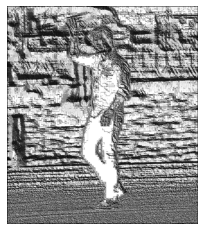

(array([1.48960e+04, 6.73100e+03, 2.83300e+03, 4.83300e+03, 8.23000e+02,
        4.77000e+02, 2.17700e+03, 1.38610e+04, 5.96700e+03, 1.01300e+03,
        4.04000e+02, 7.60000e+02, 2.78500e+03, 7.11000e+02, 9.85800e+03,
        5.35940e+04, 8.37000e+02, 3.74000e+03, 2.70000e+02, 9.42000e+02,
        8.40000e+01, 7.70000e+01, 1.10000e+02, 1.00300e+03, 2.60700e+03,
        1.03100e+03, 3.75000e+02, 7.44000e+02, 2.67500e+03, 9.58000e+02,
        1.58580e+04, 8.21830e+04, 2.75700e+03, 8.19000e+02, 9.44000e+02,
        5.66000e+02, 3.19000e+02, 8.30000e+01, 2.80000e+02, 9.74000e+02,
        3.79000e+02, 8.60000e+01, 4.20000e+01, 5.00000e+01, 3.38000e+02,
        1.05000e+02, 4.20000e+02, 9.35000e+02, 2.04700e+03, 9.49000e+02,
        2.88000e+02, 5.82000e+02, 1.04000e+02, 4.80000e+01, 1.78000e+02,
        8.59000e+02, 8.55000e+03, 1.01000e+03, 3.61000e+02, 6.11000e+02,
        1.11740e+04, 6.73000e+02, 2.16850e+04, 1.93030e+04, 7.71000e+02,
        4.98000e+02, 2.76000e+02, 5.01000e+02, 1.11

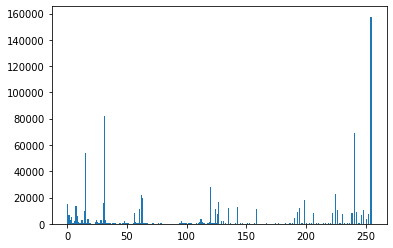

In [6]:
plt.imshow(LBP_res,cmap = 'gray')
plt.axis('off')
plt.show()
plt.hist(LBP_res.ravel(), bins=256)


<div align=right>
<font face="XB Niloofar">
<font size=6 ,bold>
<p></p>
<font size=4>
    در این بخش هم از تابع اماده استفاده شده است

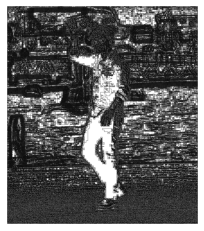

(array([1.39890e+05, 1.54640e+05, 1.41790e+04, 2.39684e+05, 1.99800e+03,
        1.65800e+03, 4.04200e+03, 5.56300e+04, 0.00000e+00, 0.00000e+00,
        1.63000e+02, 2.20000e+03, 0.00000e+00, 1.39300e+03, 4.79300e+04,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.63765e+05]),
 array([  0. ,   8.5,  17. ,  25.5,  34. ,  42.5,  51. ,  59.5,  68. ,
         76.5,  85. ,  93.5, 102. , 110.5, 119. , 127.5, 136. , 144.5,
        153. , 161.5, 170. , 178.5, 187. , 195.5, 204. , 212.5, 221. ,
        229.5, 238. , 246.5, 255. ]),
 <BarContainer object of 30 artists>)

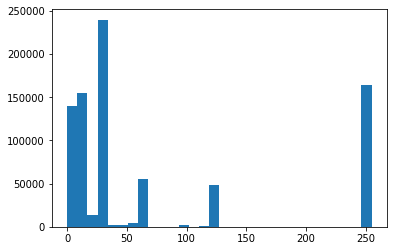

In [7]:
from skimage.feature import local_binary_pattern
lbp_image=local_binary_pattern(img,8,1,method='ror')
plt.imshow(lbp_image,cmap = 'gray')
plt.axis('off')
plt.show()
plt.hist(lbp_image.ravel(), bins=30)


<div align=right>
<font face="XB Niloofar">
<font size=6 ,bold>
بخش دوم:
<p></p>
<font size=4>
در این بخش پارامتر های مختلف فیلتر گابور را تغییر داده و نتایج را مشاهده میکنیم، پارامتر متغیر در نمودار و مقدار آن در بالای تصویر ذکر شده است.

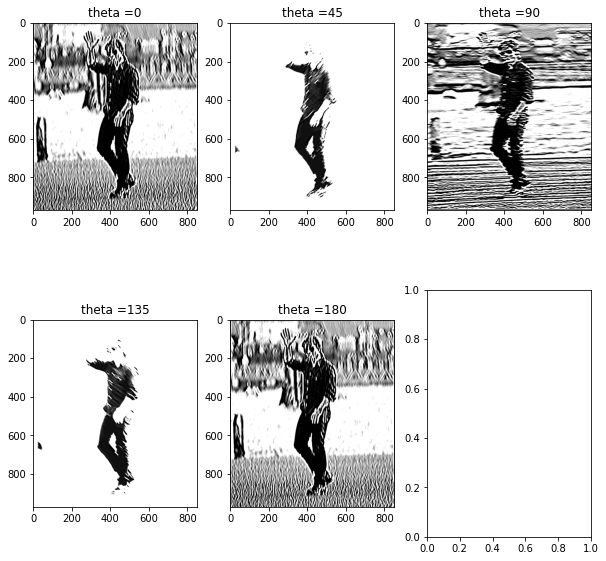

In [8]:
fig, ax = plt.subplots(2,3 , figsize =(10,10))
for i,theta in enumerate([0, 45, 90, 135, 180]):
    theta = theta / 180.0 * np.pi
    kernel = cv2.getGaborKernel((15,15), sigma = 4, theta = theta, lambd = 10.0, gamma = 0.5, psi = 0)
    plt.subplot(2,3,i+1)
    plt.imshow(cv2.filter2D(src=img, ddepth = -1, kernel=kernel),cmap='gray')
    plt.title(f'theta ={int(theta/np.pi * 180)}')

### sigma

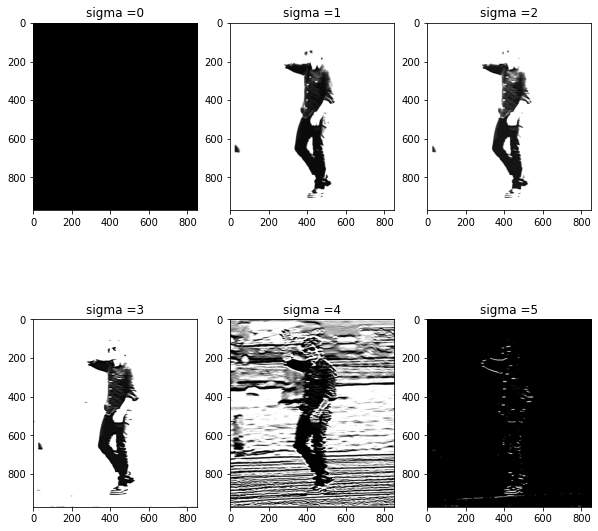

In [9]:
fig, ax = plt.subplots(2,3 , figsize =(10,10))
for i,sigma in enumerate([0, 1, 2, 3, 4, 5]):
    theta = 90 / 180.0 * np.pi
    kernel = cv2.getGaborKernel((15,15), sigma = sigma, theta = theta, lambd = 10.0, gamma = 0.5, psi = 0)
    plt.subplot(2,3,i+1)
    plt.imshow(cv2.filter2D(src=img, ddepth = -1, kernel=kernel),cmap='gray')
    plt.title(f'sigma ={sigma}')

### lambd

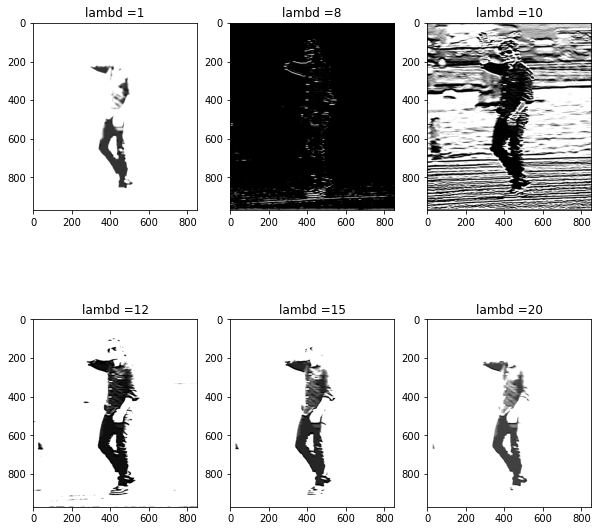

In [10]:
fig, ax = plt.subplots(2,3 , figsize =(10,10))
for i,lambd in enumerate([1, 8, 10, 12, 15, 20]):
    theta = 90 / 180.0 * np.pi
    kernel = cv2.getGaborKernel((15,15), sigma = 4, theta = theta, lambd = lambd, gamma = 0.5, psi = 0)
    plt.subplot(2,3,i+1)
    plt.imshow(cv2.filter2D(src=img, ddepth = -1, kernel=kernel),cmap='gray')
    plt.title(f'lambd ={lambd}')

### gamma

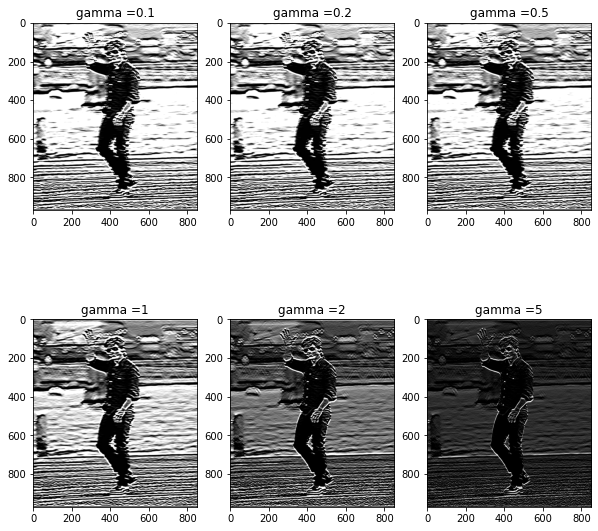

In [11]:
fig, ax = plt.subplots(2,3 , figsize =(10,10))
for i,gamma in enumerate([0.1, 0.2, 0.5, 1, 2, 5]):
    theta = 90 / 180.0 * np.pi
    kernel = cv2.getGaborKernel((15,15), sigma = 4, theta = theta, lambd = 10.0, gamma = gamma, psi = 0)
    plt.subplot(2,3,i+1)
    plt.imshow(cv2.filter2D(src=img, ddepth = -1, kernel=kernel),cmap='gray')
    plt.title(f'gamma ={gamma}')


<div align=right>
<font face="XB Niloofar">
<font size=6 ,bold>
بخش سوم:
<p></p>
<font size=4>
در این بخش ابتدا توصیف گر را بر روی تصویر اعمال کرده و انرا قابل نمایش میکنیم. 

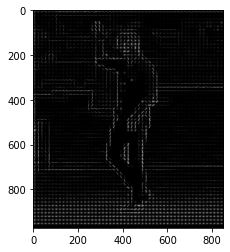

In [12]:
fd, hog_img = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(2, 2), visualize=True)


hog_img_rescaled = exposure.rescale_intensity(hog_img, in_range=(0, 10))

plt.imshow(hog_img_rescaled,cmap = 'gray')


<div align=right>
<font face="XB Niloofar">
<font size=6 ,bold>
<p></p>
<font size=4>
در ادامه ماسکی که در ادامه نشان داده شده بر تصاویر اعمال کنیم، توصیف گر آنها را استخراج کرده و آنها را به عنوان دیتا اصلی ذخیره میکنیم.پس از ان داده ها را به دو مجموعه ترین و تست تقسیم کرده و بهترین طبقه بند موجود را با بهترین پارامتر ها به دست می آوریم و در نهایت آنرا روی مجموعه تست خود تست میکنیم.

(47, 19584)
(85, 19584)


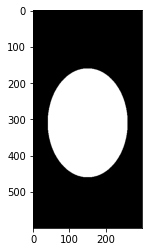

In [13]:
rows = 600
cols = 300
Mask=np.zeros((rows,cols))
for i in range(rows):
    for j in range(cols):
        if (((i-310)**2)/(150**2)) + (((j-150)**2)/(110**2)) < 1:
            Mask[i,j]=1
plt.imshow(Mask,cmap='gray')

path = 'disgust'
disgust = []
for file in os.listdir(path):
    img = io.imread(path + "\\"+ file, as_gray=True)*Mask
    fd, hog_img = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(2, 2), visualize=True)
    disgust.append(fd)

disgust = np.array(disgust)

path = 'happy'
happy = []
for file in os.listdir(path):
    img = io.imread(path + "\\"+ file, as_gray=True)*Mask
    fd, hog_img = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(2, 2), visualize=True)
    happy.append(fd)

happy = np.array(happy)
print(disgust.shape)
print(happy.shape)

In [14]:
disgust_train, disgust_test = train_test_split(disgust, train_size =35, random_state=42)
happy_train, happy_test = train_test_split(happy, train_size =65, random_state=42)
print(disgust_train.shape, disgust_test.shape)
print(happy_train.shape, happy_test.shape)

(35, 19584) (12, 19584)
(65, 19584) (20, 19584)


In [15]:
X_train = np.append(disgust_train,happy_train, axis=0)
X_test = np.append(disgust_test,happy_test, axis=0)
y_train = np.append(
    np.ones((disgust_train.shape[0], 1)),
    np.zeros((happy_train.shape[0], 1)), axis=0)
y_test = np.append(
    np.ones((disgust_test.shape[0], 1)),
    np.zeros((happy_test.shape[0], 1)), axis=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(100, 19584) (100, 1)
(32, 19584) (32, 1)


In [16]:
param_grid = [
  
  {'C': [0.0001, 0.001 , 0.01 , 0.1 , 1 , 10 , 100, 1000], 'gamma': [1e-12, 1e-10, 1e-8, 1e-6, 1e-4, 1e-2 ,1,10], 'kernel': ['rbf']},
 ]
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END .C=0.0001, gamma=1e-12, kernel=rbf;, score=0.650 total time=   0.2s
[CV 2/5] END .C=0.0001, gamma=1e-12, kernel=rbf;, score=0.650 total time=   0.1s
[CV 3/5] END .C=0.0001, gamma=1e-12, kernel=rbf;, score=0.650 total time=   0.1s
[CV 4/5] END .C=0.0001, gamma=1e-12, kernel=rbf;, score=0.650 total time=   0.1s
[CV 5/5] END .C=0.0001, gamma=1e-12, kernel=rbf;, score=0.650 total time=   0.1s
[CV 1/5] END .C=0.0001, gamma=1e-10, kernel=rbf;, score=0.650 total time=   0.1s
[CV 2/5] END .C=0.0001, gamma=1e-10, kernel=rbf;, score=0.650 total time=   0.1s
[CV 3/5] END .C=0.0001, gamma=1e-10, kernel=rbf;, score=0.650 total time=   0.1s
[CV 4/5] END .C=0.0001, gamma=1e-10, kernel=rbf;, score=0.650 total time=   0.1s
[CV 5/5] END .C=0.0001, gamma=1e-10, kernel=rbf;, score=0.650 total time=   0.1s
[CV 1/5] END .C=0.0001, gamma=1e-08, kernel=rbf;, score=0.650 total time=   0.2s
[CV 2/5] END .C=0.0001, gamma=1e-08, kernel=rbf

[CV 2/5] END ..C=0.01, gamma=0.0001, kernel=rbf;, score=0.650 total time=   0.1s
[CV 3/5] END ..C=0.01, gamma=0.0001, kernel=rbf;, score=0.650 total time=   0.1s
[CV 4/5] END ..C=0.01, gamma=0.0001, kernel=rbf;, score=0.650 total time=   0.1s
[CV 5/5] END ..C=0.01, gamma=0.0001, kernel=rbf;, score=0.650 total time=   0.1s
[CV 1/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.650 total time=   0.2s
[CV 2/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.650 total time=   0.2s
[CV 3/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.650 total time=   0.2s
[CV 4/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.650 total time=   0.2s
[CV 5/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.650 total time=   0.3s
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.650 total time=   0.2s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.650 total time=   0.2s
[CV 3/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.650 total time=   0.3s
[CV 4/5] END .......C=0.01, 

[CV 4/5] END .....C=10, gamma=1e-12, kernel=rbf;, score=0.650 total time=   0.1s
[CV 5/5] END .....C=10, gamma=1e-12, kernel=rbf;, score=0.650 total time=   0.1s
[CV 1/5] END .....C=10, gamma=1e-10, kernel=rbf;, score=0.650 total time=   0.1s
[CV 2/5] END .....C=10, gamma=1e-10, kernel=rbf;, score=0.650 total time=   0.1s
[CV 3/5] END .....C=10, gamma=1e-10, kernel=rbf;, score=0.650 total time=   0.1s
[CV 4/5] END .....C=10, gamma=1e-10, kernel=rbf;, score=0.650 total time=   0.1s
[CV 5/5] END .....C=10, gamma=1e-10, kernel=rbf;, score=0.650 total time=   0.1s
[CV 1/5] END .....C=10, gamma=1e-08, kernel=rbf;, score=0.650 total time=   0.1s
[CV 2/5] END .....C=10, gamma=1e-08, kernel=rbf;, score=0.650 total time=   0.1s
[CV 3/5] END .....C=10, gamma=1e-08, kernel=rbf;, score=0.650 total time=   0.1s
[CV 4/5] END .....C=10, gamma=1e-08, kernel=rbf;, score=0.650 total time=   0.1s
[CV 5/5] END .....C=10, gamma=1e-08, kernel=rbf;, score=0.650 total time=   0.1s
[CV 1/5] END .....C=10, gamm

[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.950 total time=   0.2s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.2s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.950 total time=   0.2s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.2s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.2s
[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.650 total time=   0.2s
[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.650 total time=   0.2s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.650 total time=   0.2s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.650 total time=   0.2s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.650 total time=   0.2s
[CV 1/5] END ......C=1000, gamma=10, kernel=rbf;, score=0.650 total time=   0.2s
[CV 2/5] END ......C=1000, gamma=10, kernel=rbf;, score=0.650 total time=   0.2s
[CV 3/5] END ......C=1000, g

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [1e-12, 1e-10, 1e-08, 1e-06, 0.0001, 0.01, 1,
                                    10],
                          'kernel': ['rbf']}],
             verbose=3)

In [17]:
print(grid.best_params_,grid.best_score_)
clf = grid.best_estimator_
y_pred = clf.predict(X_test)

Acc = accuracy_score(y_pred, y_test)

print('acc=',Acc)
print(confusion_matrix(y_pred, y_test))


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'} 0.9800000000000001
acc= 1.0
[[20  0]
 [ 0 12]]
